In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver
import seaborn as sns
from lxml import html
sns.set_style('darkgrid')
import math
%matplotlib inline
import re
import matplotlib.pyplot as plt 

In [2]:
df2 = pd.read_csv("amazon1.csv")

In [3]:
df2

,Product,Brands,MRP,Offer_Price,Discount Price,Discount,Rating,Reviews
0,Samsung Galaxy Book2 (NP750) Intel 12th Gen co...,Samsung,83990,64490,19500,23,4.1,90
1,Fujitsu CH Intel Evo Core i5 11th Gen 13.3” FH...,Fujitsu,100590,54990,45600,45,3.9,143
2,"ASUS VivoBook 15 (2021), 15.6-inch (39.62 cm) ...",Asus,33990,25990,8000,24,4.0,840
3,HP 245 G8 Laptop PC with AMD Ryzen 3 3250U/8 G...,HP,38574,25999,12575,33,4.0,3
4,Lenovo E41-55 AMD 14-inch HD 220 Nits Antiglar...,Lenovo,38000,18990,19010,50,3.9,12
...,...,...,...,...,...,...,...,...
403,(Renewed) HP Zbook Mini Server Laptop Intel E3...,Renewed,195000,52490,142510,73,0.0,0
404,(Renewed) Dell Latitude Laptop 7390 Intel Core...,Renewed,129000,36990,92010,71,0.0,0
405,(Renewed) HP Ultra Beautiful Laptop 348G4 Inte...,Renewed,89990,20990,69000,77,0.0,0
406,(Renewed) Lenovo Thinkpad Laptop x270 Intel Co...,Renewed,129000,28990,100010,78,0.0,0


In [4]:
# Converting it to int64
df2 = df2.astype({'Reviews':'int64'})
df2 = df2.astype({'Discount':'int64'})
df2 = df2.astype({'Discount Price':'int64'})
df2 = df2.astype({'MRP':'int64'})
df2 = df2.astype({'Offer_Price':'int64'})

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product         408 non-null    object 
 1   Brands          408 non-null    object 
 2   MRP             408 non-null    int64  
 3   Offer_Price     408 non-null    int64  
 4   Discount Price  408 non-null    int64  
 5   Discount        408 non-null    int64  
 6   Rating          408 non-null    float64
 7   Reviews         408 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 25.6+ KB


In [6]:
df2.isna().sum()

Product           0
Brands            0
MRP               0
Offer_Price       0
Discount Price    0
Discount          0
Rating            0
Reviews           0
dtype: int64

In [7]:
df2

,Product,Brands,MRP,Offer_Price,Discount Price,Discount,Rating,Reviews
0,Samsung Galaxy Book2 (NP750) Intel 12th Gen co...,Samsung,83990,64490,19500,23,4.1,90
1,Fujitsu CH Intel Evo Core i5 11th Gen 13.3” FH...,Fujitsu,100590,54990,45600,45,3.9,143
2,"ASUS VivoBook 15 (2021), 15.6-inch (39.62 cm) ...",Asus,33990,25990,8000,24,4.0,840
3,HP 245 G8 Laptop PC with AMD Ryzen 3 3250U/8 G...,HP,38574,25999,12575,33,4.0,3
4,Lenovo E41-55 AMD 14-inch HD 220 Nits Antiglar...,Lenovo,38000,18990,19010,50,3.9,12
...,...,...,...,...,...,...,...,...
403,(Renewed) HP Zbook Mini Server Laptop Intel E3...,Renewed,195000,52490,142510,73,0.0,0
404,(Renewed) Dell Latitude Laptop 7390 Intel Core...,Renewed,129000,36990,92010,71,0.0,0
405,(Renewed) HP Ultra Beautiful Laptop 348G4 Inte...,Renewed,89990,20990,69000,77,0.0,0
406,(Renewed) Lenovo Thinkpad Laptop x270 Intel Co...,Renewed,129000,28990,100010,78,0.0,0


In [8]:
# Converting Single Brands Name with multiple case to single case
df2['Brands'] = df2['Brands'].replace(['ASUS', 'Asus'], 'Asus')
df2['Brands'] = df2['Brands'].replace(['HP', 'Hp'], 'HP')
df2['Brands'] = df2['Brands'].replace(['Mi', 'MI'], 'MI')

In [9]:
df2

,Product,Brands,MRP,Offer_Price,Discount Price,Discount,Rating,Reviews
0,Samsung Galaxy Book2 (NP750) Intel 12th Gen co...,Samsung,83990,64490,19500,23,4.1,90
1,Fujitsu CH Intel Evo Core i5 11th Gen 13.3” FH...,Fujitsu,100590,54990,45600,45,3.9,143
2,"ASUS VivoBook 15 (2021), 15.6-inch (39.62 cm) ...",Asus,33990,25990,8000,24,4.0,840
3,HP 245 G8 Laptop PC with AMD Ryzen 3 3250U/8 G...,HP,38574,25999,12575,33,4.0,3
4,Lenovo E41-55 AMD 14-inch HD 220 Nits Antiglar...,Lenovo,38000,18990,19010,50,3.9,12
...,...,...,...,...,...,...,...,...
403,(Renewed) HP Zbook Mini Server Laptop Intel E3...,Renewed,195000,52490,142510,73,0.0,0
404,(Renewed) Dell Latitude Laptop 7390 Intel Core...,Renewed,129000,36990,92010,71,0.0,0
405,(Renewed) HP Ultra Beautiful Laptop 348G4 Inte...,Renewed,89990,20990,69000,77,0.0,0
406,(Renewed) Lenovo Thinkpad Laptop x270 Intel Co...,Renewed,129000,28990,100010,78,0.0,0


# The Number of products offered by different brands

In [10]:
df2['Brands'].value_counts()

Asus        88
Lenovo      81
Renewed     75
HP          49
Acer        28
Dell        22
Apple       15
MSI         13
Samsung     12
Honor        5
MI           3
LG           3
Chuwi        2
Xiaomi       2
GIGABYTE     2
AVITA        2
Infinix      2
Fujitsu      1
ULTIMUS      1
AXL          1
THAKAR       1
Name: Brands, dtype: int64

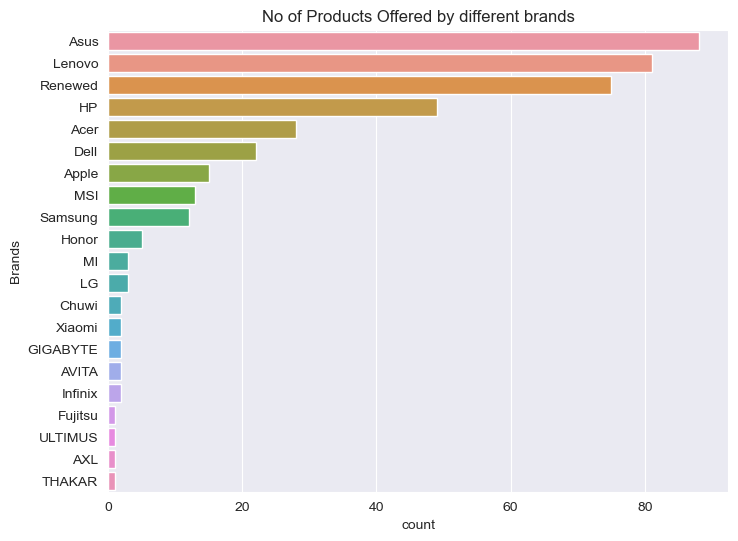

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(y = 'Brands', data=df2, order = df2['Brands'].value_counts().index)
plt.title("No of Products Offered by different brands")
plt.show()

* ### As per observation Asus has more no.of.products in amazon followed by Lenova, Renewed porducts, HP , Acer and so on.
* ### Chuwi, Xiaomi, Gigabyte,Avita, Infinix, Fujitsu, Ultimus, Axl and Thakar has least no.of.products.

# Brand with the highest MRP price

In [12]:
top_mrp = df2.sort_values(by='MRP', ascending =False)
top_mrp

,Product,Brands,MRP,Offer_Price,Discount Price,Discount,Rating,Reviews
331,"MSI CreatorPro Z17, Intel 12th Gen. i7-12700H,...",MSI,492990,444990,48000,10,3.0,3
350,"ASUS ROG Zephyrus Duo 16, 16"" (40.64 cm) UHD+/...",Asus,477980,398588,79392,17,3.0,8
236,"ASUS ROG Zephyrus Duo 16 Dual Screen Laptop, 1...",Asus,473990,396990,77000,16,3.0,8
256,ASUS ROG Zephyrus Duo 16 (2022) Dual Screen La...,Asus,467990,391990,76000,16,3.6,2
262,"Dell New Alienware x15 R2 Gaming Laptop, Intel...",Dell,463132,356600,106532,23,3.3,3
...,...,...,...,...,...,...,...,...
11,Apple 2023 MacBook Pro Laptop M2 Pro chip with...,Apple,0,269900,0,0,5.0,4
101,Apple 2022 MacBook Pro Laptop with M2 chip: 33...,Apple,0,149900,0,0,4.3,7
52,Apple 2023 MacBook Pro Laptop M2 Pro chip with...,Apple,0,249900,0,0,5.0,1
82,Apple 2023 MacBook Pro Laptop M2 Pro chip with...,Apple,0,249900,0,0,0.0,0


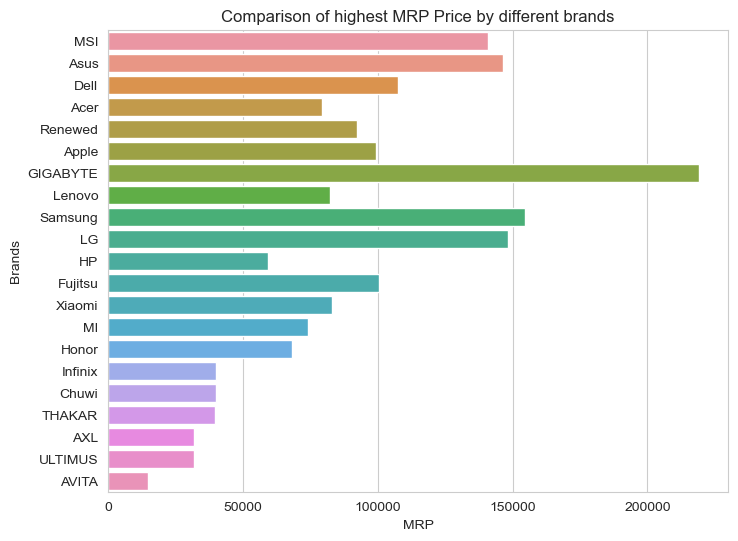

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(y='Brands', x='MRP', data=top_mrp, ci=None)
plt.title("Comparison of highest MRP Price by different brands")
plt.xlabel("MRP")
plt.ylabel("Brands")
plt.show()

* ### As per observation Gigabyte has highest MRP price, followed by Samsung, LG, Asus, MSI and other brands.
* ### Avita has lowest MRP Price.

# Brand with the lowest Offer price

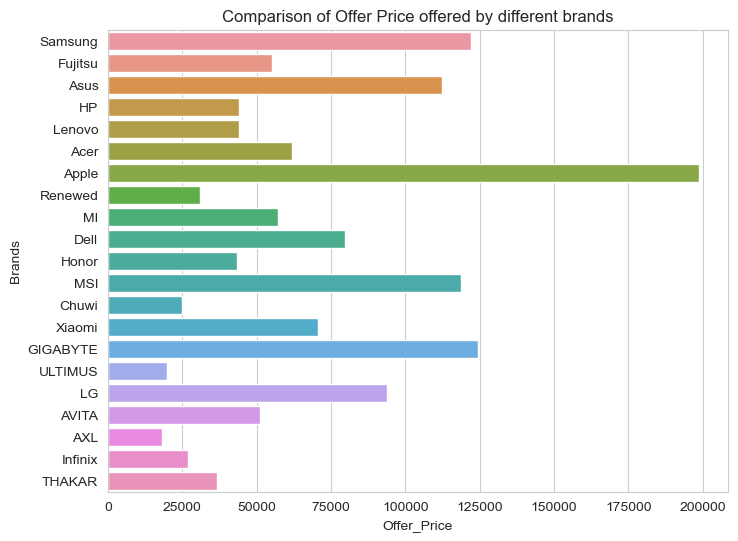

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(y='Brands', x='Offer_Price', data=df2, ci=None)
plt.title("Comparison of Offer Price offered by different brands")
plt.xlabel("Offer_Price")
plt.ylabel("Brands")
plt.show()

* ### Apple brand has highest Offer price, followed by Gigabyte,Samsung, MSI, and Asus.
* ### AXL,Ultimus,Chuwi,Infinix and Renewed offering lowest offer price.

# Brand with the highest Discount price

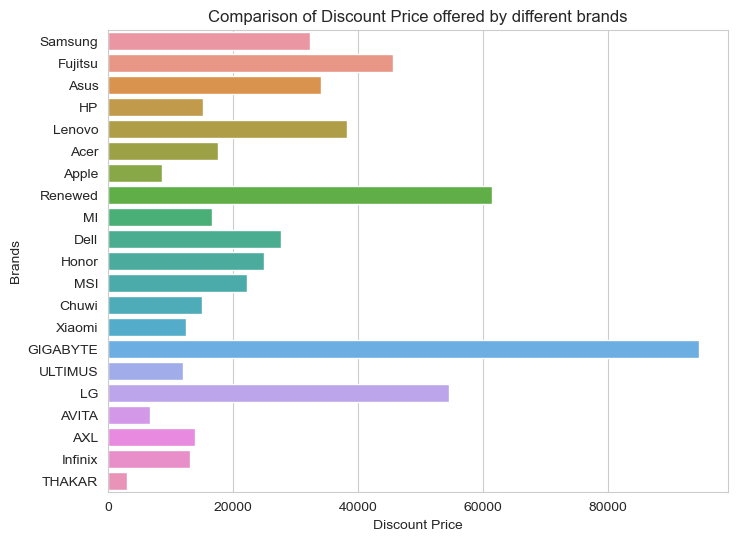

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(y='Brands', x='Discount Price', data=df2, ci=None)
plt.title("Comparison of Discount Price offered by different brands")
plt.xlabel("Discount Price")
plt.ylabel("Brands")
plt.show()

* ### Gigabyte brand providing highest discount price, followed by Renewed products, LG, Fujitsu and Lenovo.
* ### Thakar, Avita, Apple, Infinix and Axl providing lowest Discount Price.

# Brands which is giving high Discount

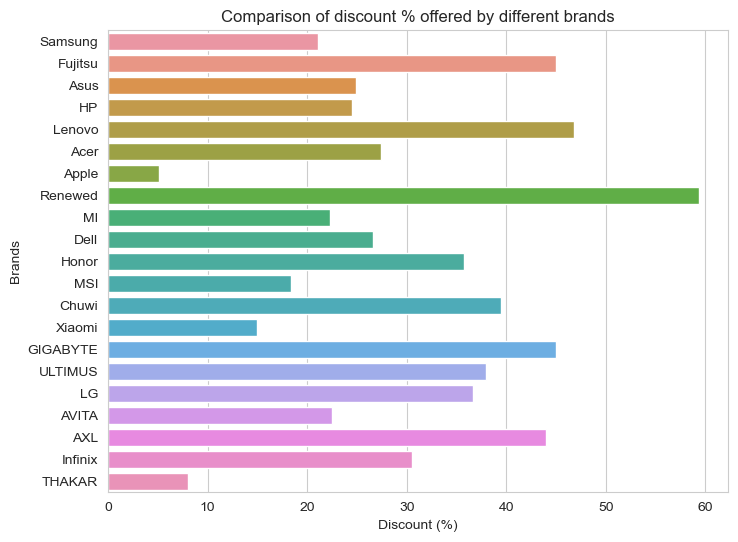

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(y='Brands', x='Discount', data=df2, ci=None)
plt.title("Comparison of discount % offered by different brands")
plt.xlabel("Discount (%)")
plt.ylabel("Brands")
plt.show()

* ### For Renewed Products has highest discount %, followed by Lenovo, Fujitsu, Gigabyte and AXL.
* ### Thakar, Avita, Apple, Infinix and Axl providing lowest Discount Price.

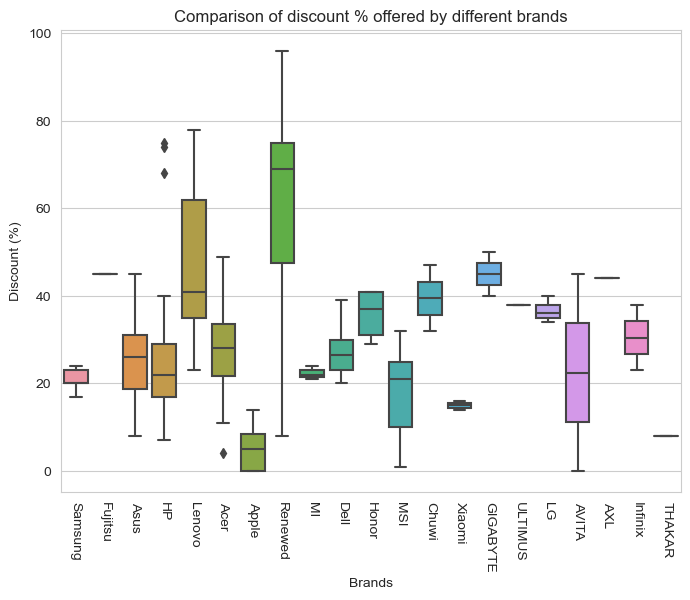

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.boxplot(x='Brands', y='Discount', data=df2)
plt.title("Comparison of discount % offered by different brands")
plt.xlabel("Brands")
plt.ylabel("Discount (%)")
plt.xticks(rotation = 270)

plt.show()

* ### For Renewed product min discount %  is 10 and max is 90%  for most of the products discount is in between  50% to 75%. Where as for
* ### Lenovo min discount % is 22% and max discount is 78% and for most of products has the discount in between the 36% to 62% 

# Most Selling Brand based on reviews

In [18]:
comp = df2.groupby('Brands')['Reviews'].sum().sort_values(ascending=False)

In [19]:
comp

Brands
Lenovo      20931
Apple       16312
HP          11318
Asus         7540
Acer         3322
MI           2900
Renewed      2037
Honor         982
Dell          824
Samsung       344
AVITA         244
MSI           148
Fujitsu       143
LG            101
Xiaomi         84
Chuwi          20
Infinix         3
AXL             2
GIGABYTE        1
THAKAR          0
ULTIMUS         0
Name: Reviews, dtype: int64

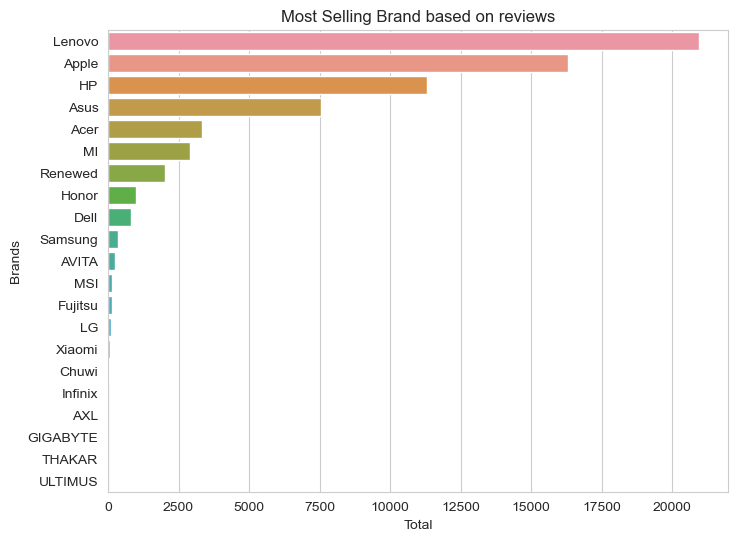

In [20]:
plt.figure(figsize=(8,6))
comp = df2.groupby('Brands')['Reviews'].sum().sort_values(ascending=False).reset_index(name='Total')
sns.barplot(data=comp, x='Total', y='Brands')
plt.title("Most Selling Brand based on reviews")
plt.show()

* ### Lenova is the most selling brand as per no.of.reviews

# Brand with the highest Ratings

In [21]:
comp1 = df2.groupby('Brands')['Rating'].sum().sort_values(ascending=False)
comp1

Brands
Asus        324.3
Lenovo      215.4
HP          161.2
Renewed     116.1
Acer         98.6
Dell         66.2
Apple        61.0
MSI          39.6
Samsung      27.7
Honor        12.9
MI           12.9
LG           12.5
Xiaomi        8.2
Chuwi         8.1
GIGABYTE      5.0
AVITA         4.3
Fujitsu       3.9
Infinix       3.0
AXL           3.0
THAKAR        0.0
ULTIMUS       0.0
Name: Rating, dtype: float64

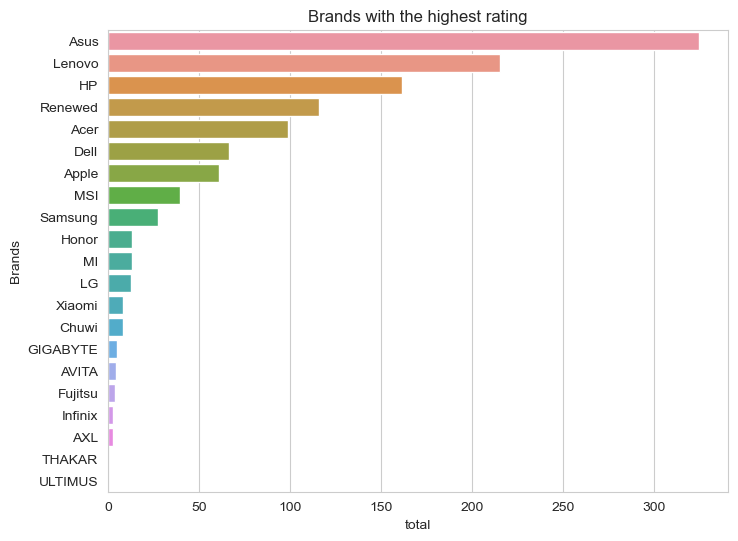

In [22]:
plt.figure(figsize=(8,6))
comp1 = df2.groupby('Brands')['Rating'].sum().sort_values(ascending=False).reset_index(name='total')
sns.barplot(data=comp1, x='total', y='Brands')
plt.title("Brands with the highest rating")
plt.show()

* ### Asus has highest no of ratings

# Brand with the highest Rating with mean rating values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'MI'),
  Text(1, 0, 'LG'),
  Text(2, 0, 'Xiaomi'),
  Text(3, 0, 'Apple'),
  Text(4, 0, 'Chuwi'),
  Text(5, 0, 'Fujitsu'),
  Text(6, 0, 'Asus'),
  Text(7, 0, 'Acer'),
  Text(8, 0, 'HP'),
  Text(9, 0, 'MSI'),
  Text(10, 0, 'Dell'),
  Text(11, 0, 'AXL'),
  Text(12, 0, 'Lenovo'),
  Text(13, 0, 'Honor'),
  Text(14, 0, 'GIGABYTE'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'AVITA'),
  Text(17, 0, 'Renewed'),
  Text(18, 0, 'Infinix'),
  Text(19, 0, 'THAKAR'),
  Text(20, 0, 'ULTIMUS')])

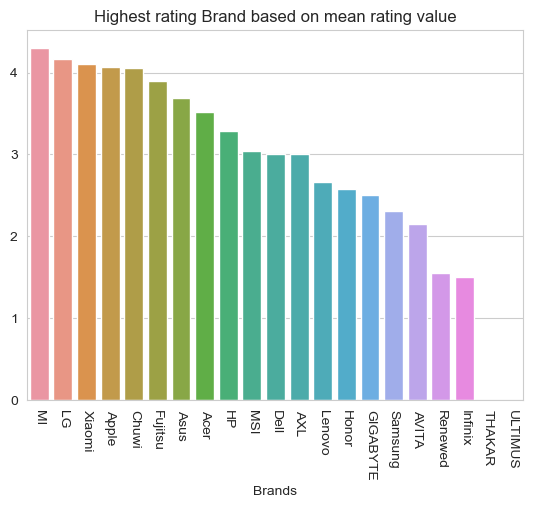

In [23]:
mean_rating = df2.groupby('Brands')['Rating'].mean().sort_values(ascending=False)
pl = sns.barplot(x = mean_rating.index, y = mean_rating.values)
plt.title("Highest rating Brand based on mean rating value")
plt.xticks(rotation = 270)

* ### MI has highest rating based on mean rating values

In [24]:
mean_rating

Brands
MI          4.300000
LG          4.166667
Xiaomi      4.100000
Apple       4.066667
Chuwi       4.050000
Fujitsu     3.900000
Asus        3.685227
Acer        3.521429
HP          3.289796
MSI         3.046154
Dell        3.009091
AXL         3.000000
Lenovo      2.659259
Honor       2.580000
GIGABYTE    2.500000
Samsung     2.308333
AVITA       2.150000
Renewed     1.548000
Infinix     1.500000
THAKAR      0.000000
ULTIMUS     0.000000
Name: Rating, dtype: float64

# Brands which has rating 5.0

In [25]:
df_brands_count = df2[df2['Rating']==5.0]['Brands'].value_counts()
df_brands_count

Asus        8
Apple       4
HP          3
Dell        1
MSI         1
GIGABYTE    1
Acer        1
Name: Brands, dtype: int64

<AxesSubplot:>

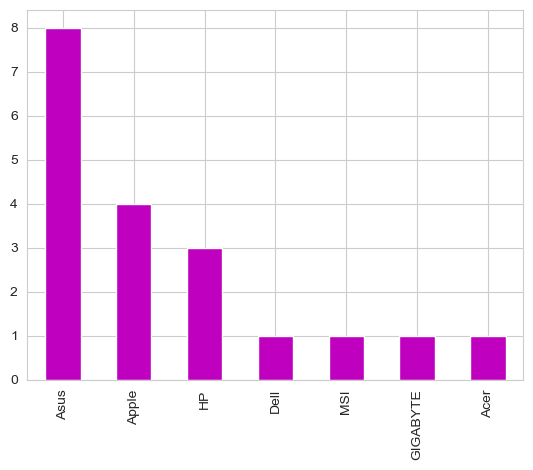

In [26]:
df2[df2['Rating']==5.0]['Brands'].value_counts().plot(kind='bar',color='m')

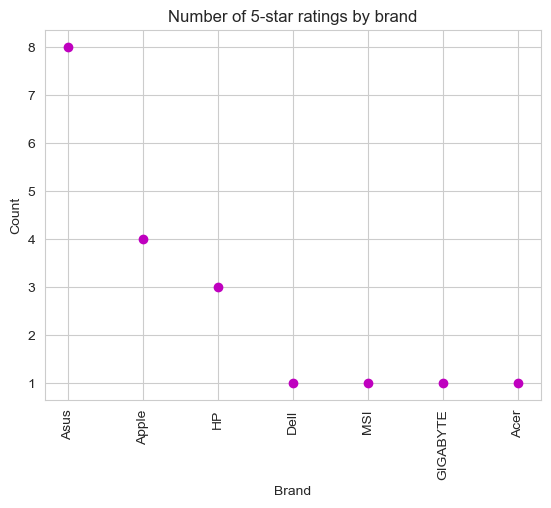

In [27]:
plt.scatter(x=df_brands_count.index, y=df_brands_count.values, color='m')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of 5-star ratings by brand')

plt.xticks(rotation=90)
plt.show()

* ### For most no.of.products of Asus has got 5.0 ratings

# Brands count on each rating

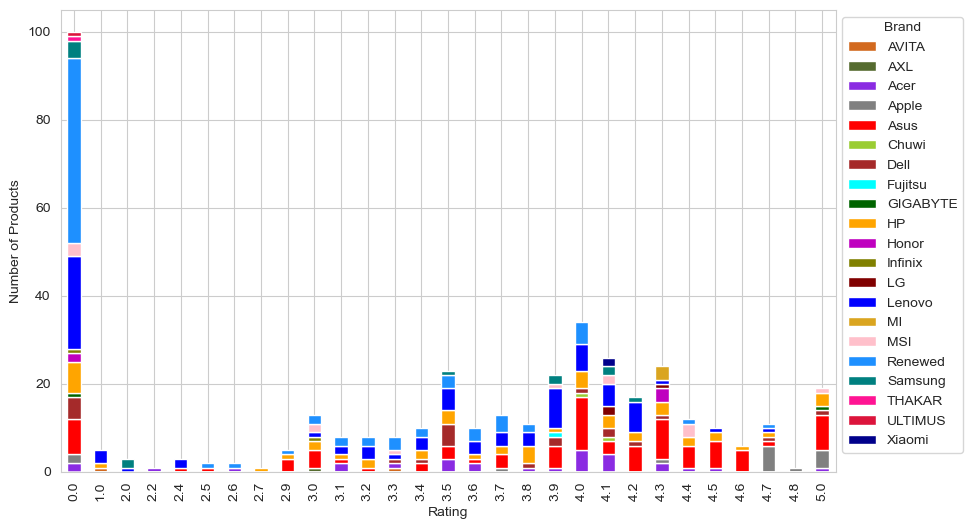

In [28]:
colors = {'Asus': 'red' ,
'Lenovo':'blue'  ,    
'Renewed':'#1E90FF' ,   
'HP':'orange'  ,   
'Acer':'#8A2BE2'  ,      
'Dell' : 'brown' ,     
'Apple': 'gray' ,    
'MSI' : 'pink'  ,    
'Samsung' : 'teal' ,  
'Honor' : 'm' ,     
'MI': '#DAA520'  ,        
'LG': 'maroon'  ,        
'Chuwi': '#9ACD32',       
'Xiaomi': 'darkblue' ,     
'GIGABYTE':'darkgreen' ,    
'AVITA': '#D2691E',     
'Infinix':'#808000',    
'Fujitsu':'#00FFFF'  ,    
'ULTIMUS':'#DC143C'  ,    
'AXL':'#556B2F'    ,      
'THAKAR':'#FF1493'}

brand_rating_counts = df2.groupby(['Rating', 'Brands']).size()

# Unstack the brand index to create separate columns for each brand
brand_rating_counts = brand_rating_counts.unstack(level=1)


brand_rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.legend(title='Brand', bbox_to_anchor=(1.0, 1.0))
plt.show()

* ### from the above observation we can see that for most of Renewed Products and Lenovo has recevied 0 ratings.
* ### Asus has minimum rating from  3.9 to 5.0 on 60 products

In [29]:
brand_rating_counts

Brands,AVITA,AXL,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,GIGABYTE,HP,...,Infinix,LG,Lenovo,MI,MSI,Renewed,Samsung,THAKAR,ULTIMUS,Xiaomi
Rating,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,2.0,2.0,8.0,NaN,5.0,NaN,1.0,7.0,...,1.0,NaN,21.0,NaN,3.0,42.0,4.0,1.0,1.0,NaN
1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2.2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2.6,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.9,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


# The Number of products offered by different brands in %

In [30]:
brand_counts = df2["Brands"].value_counts()

In [31]:
brand_counts

Asus        88
Lenovo      81
Renewed     75
HP          49
Acer        28
Dell        22
Apple       15
MSI         13
Samsung     12
Honor        5
MI           3
LG           3
Chuwi        2
Xiaomi       2
GIGABYTE     2
AVITA        2
Infinix      2
Fujitsu      1
ULTIMUS      1
AXL          1
THAKAR       1
Name: Brands, dtype: int64

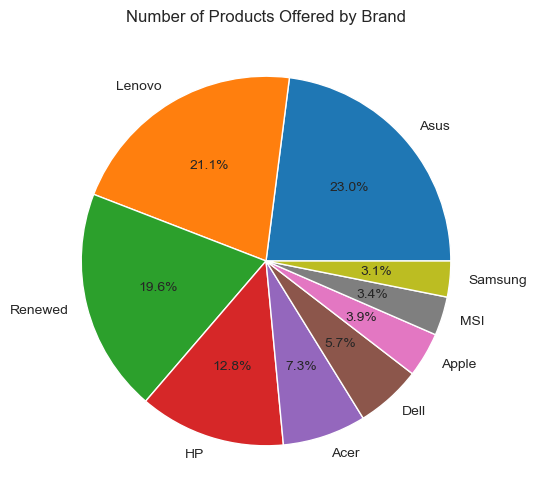

In [32]:
plt.figure(figsize=(6,6))
brand_counts = df2["Brands"].value_counts().head(9)
plt.pie(brand_counts.values, labels=brand_counts.index, autopct='%1.1f%%')
plt.title("Number of Products Offered by Brand")
plt.xticks(rotation = 270)
plt.show()

#### *As per observation Asus has more no.of.products in amazon*

# Comparision of MRP, Offer Price and Discount Price

In [33]:
top_mrp = df2.sort_values(by='MRP', ascending =False)
top_mrp

,Product,Brands,MRP,Offer_Price,Discount Price,Discount,Rating,Reviews
331,"MSI CreatorPro Z17, Intel 12th Gen. i7-12700H,...",MSI,492990,444990,48000,10,3.0,3
350,"ASUS ROG Zephyrus Duo 16, 16"" (40.64 cm) UHD+/...",Asus,477980,398588,79392,17,3.0,8
236,"ASUS ROG Zephyrus Duo 16 Dual Screen Laptop, 1...",Asus,473990,396990,77000,16,3.0,8
256,ASUS ROG Zephyrus Duo 16 (2022) Dual Screen La...,Asus,467990,391990,76000,16,3.6,2
262,"Dell New Alienware x15 R2 Gaming Laptop, Intel...",Dell,463132,356600,106532,23,3.3,3
...,...,...,...,...,...,...,...,...
11,Apple 2023 MacBook Pro Laptop M2 Pro chip with...,Apple,0,269900,0,0,5.0,4
101,Apple 2022 MacBook Pro Laptop with M2 chip: 33...,Apple,0,149900,0,0,4.3,7
52,Apple 2023 MacBook Pro Laptop M2 Pro chip with...,Apple,0,249900,0,0,5.0,1
82,Apple 2023 MacBook Pro Laptop M2 Pro chip with...,Apple,0,249900,0,0,0.0,0


In [34]:
table = pd.pivot_table(top_mrp, values=['MRP', 'Offer_Price', 'Discount Price', 'Discount'], index='Brands')

In [35]:
table

,Discount,Discount Price,MRP,Offer_Price
Brands,,,,
AVITA,22.500000,6750.000000,14995.000000,51240.000000
AXL,44.000000,14000.000000,31990.000000,17990.000000
Acer,27.464286,17589.250000,79302.107143,61712.857143
Apple,5.133333,8625.066667,99280.000000,198608.266667
Asus,24.954545,34059.250000,146326.670455,112267.420455
Chuwi,39.500000,15000.000000,39990.000000,24990.000000
Dell,26.590909,27739.545455,107592.636364,79853.090909
Fujitsu,45.000000,45600.000000,100590.000000,54990.000000
GIGABYTE,45.000000,94510.000000,218955.000000,124445.000000


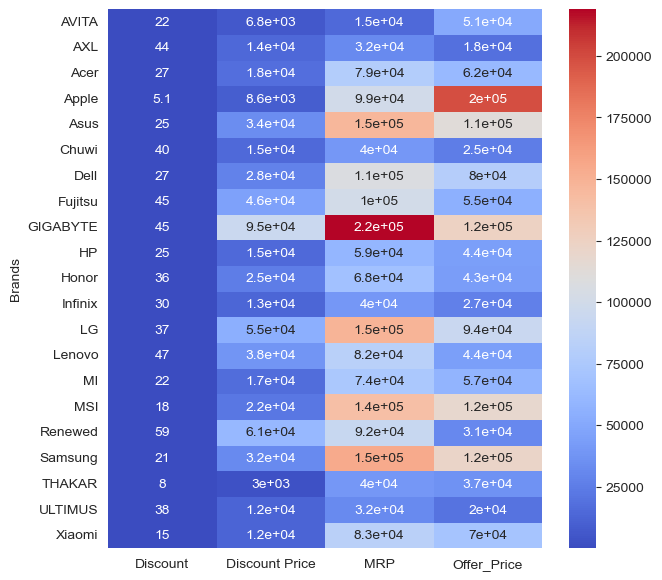

In [36]:
plt.figure(figsize=(7,7))
sns.heatmap(table, annot=True, cmap='coolwarm')
plt.show()

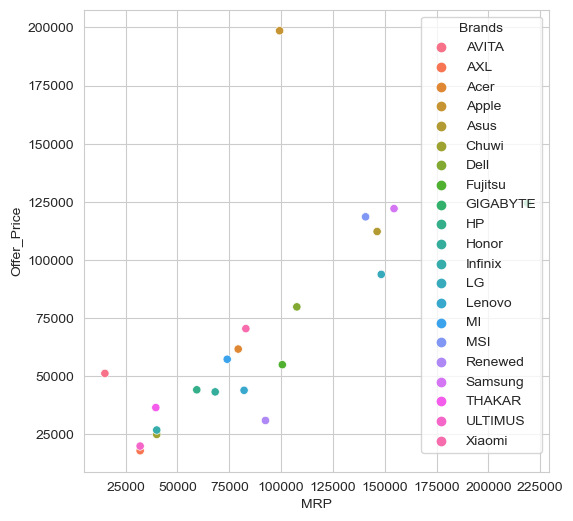

In [37]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=table, x='MRP', y='Offer_Price', hue='Brands')
plt.show()

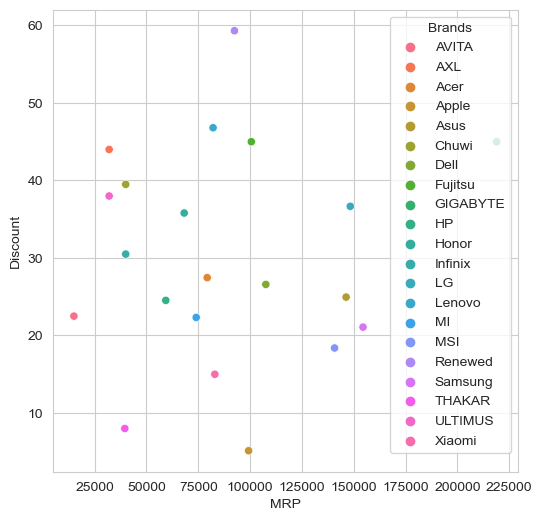

In [38]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=table, x='MRP', y='Discount', hue='Brands')
plt.show()

* ### From the pivot table and scatterplot we can observe that on Renewed products has the highest discount price with average 59% discount followed by Lenovo, with 47%, Gigabyte and Fujitsu with 45%.

In [39]:
top_mrp1 = df2.sort_values(by='MRP', ascending =False).head(20)
top_mrp1

,Product,Brands,MRP,Offer_Price,Discount Price,Discount,Rating,Reviews
331,"MSI CreatorPro Z17, Intel 12th Gen. i7-12700H,...",MSI,492990,444990,48000,10,3.0,3
350,"ASUS ROG Zephyrus Duo 16, 16"" (40.64 cm) UHD+/...",Asus,477980,398588,79392,17,3.0,8
236,"ASUS ROG Zephyrus Duo 16 Dual Screen Laptop, 1...",Asus,473990,396990,77000,16,3.0,8
256,ASUS ROG Zephyrus Duo 16 (2022) Dual Screen La...,Asus,467990,391990,76000,16,3.6,2
262,"Dell New Alienware x15 R2 Gaming Laptop, Intel...",Dell,463132,356600,106532,23,3.3,3
111,Acer Predator Helios 500 Gaming Laptop (11Th G...,Acer,449999,432159,17840,4,4.1,6
14,(Renewed) Lenovo ThinkPad T450 Intel Core i5-5...,Renewed,400000,16489,383511,96,3.7,374
324,ASUS Rog Zephyrus M16 (2022) 16 Inches 2K Qhd ...,Asus,389990,304990,85000,22,4.4,6
165,"ASUS Zenbook 17 Fold OLED, Intel EVO Core i7 1...",Asus,362990,329990,33000,9,5.0,3
33,"Apple 2021 MacBook Pro (16-inch/41.05 cm, M1 M...",Apple,329900,306990,22910,7,4.7,1145


# Line Graph for Apple and Asus to compair MRP and Offer Price

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


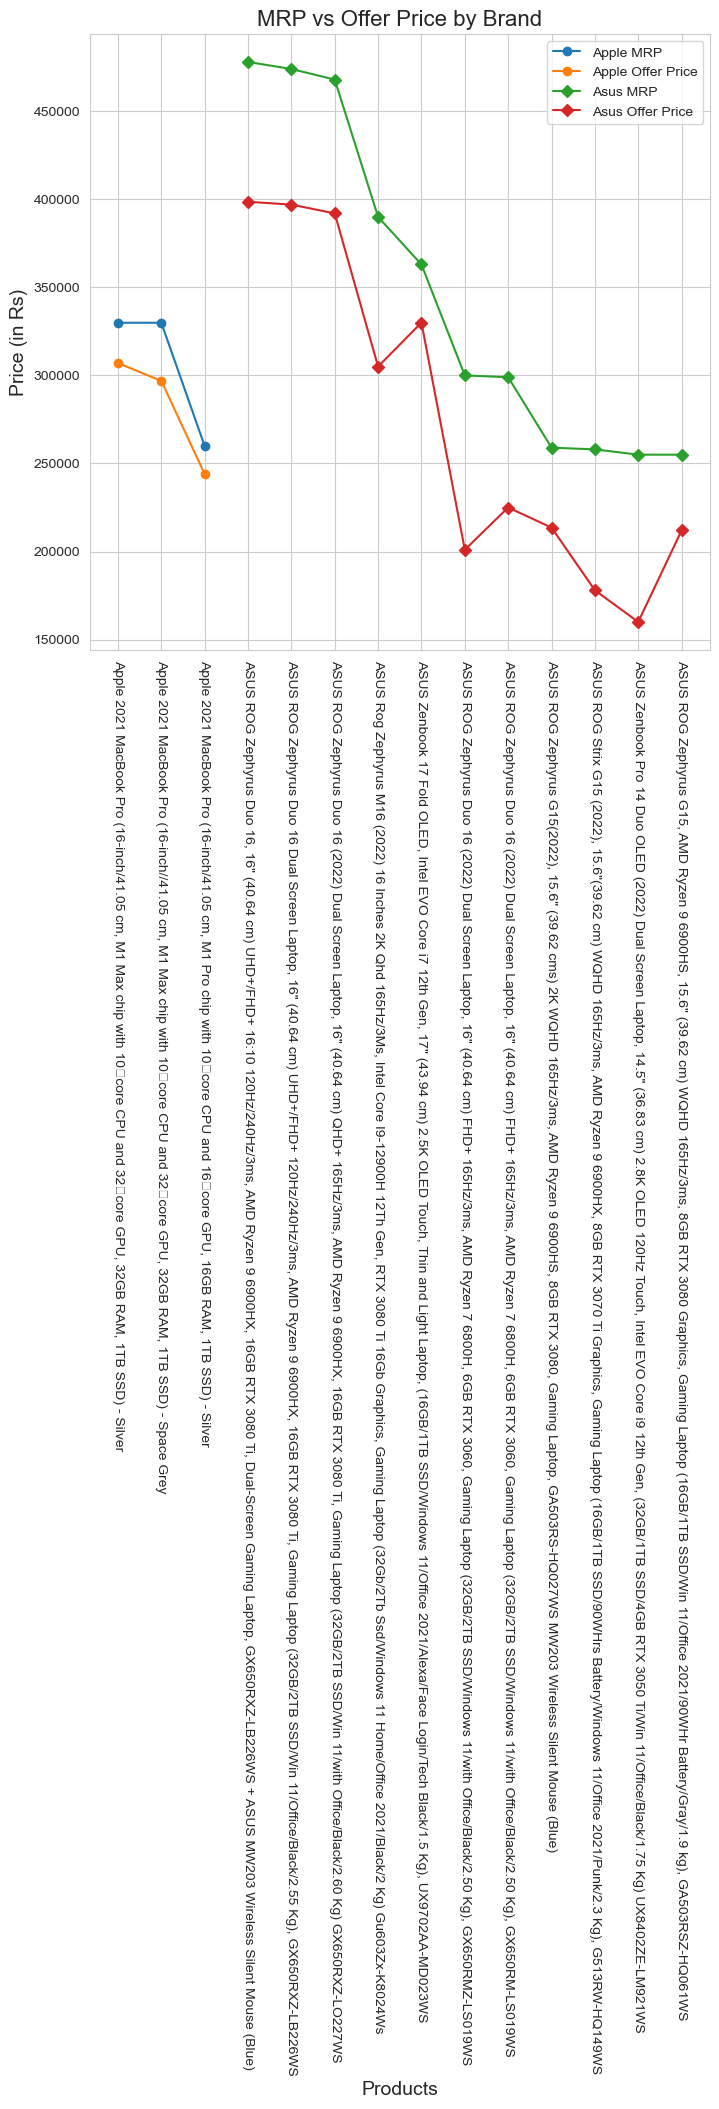

In [40]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("MRP vs Offer Price by Brand", fontsize=16)
ax.set_xlabel("Products", fontsize=14)
ax.set_ylabel("Price (in Rs)", fontsize=14)

# Plot the MRP and Offer Price for each brand as a line chart
ax.plot(top_mrp1.loc[top_mrp1["Brands"] == "Apple", "Product"], top_mrp1.loc[top_mrp1["Brands"] == "Apple", "MRP"], label="Apple MRP", marker="o")
ax.plot(top_mrp1.loc[top_mrp1["Brands"] == "Apple", "Product"], top_mrp1.loc[top_mrp1["Brands"] == "Apple", "Offer_Price"], label="Apple Offer Price", marker="o")
ax.plot(top_mrp1.loc[top_mrp1["Brands"] == "Asus", "Product"], top_mrp1.loc[top_mrp1["Brands"] == "Asus", "MRP"], label="Asus MRP", marker="D")
ax.plot(top_mrp1.loc[top_mrp1["Brands"] == "Asus", "Product"], top_mrp1.loc[top_mrp1["Brands"] == "Asus", "Offer_Price"], label="Asus Offer Price", marker="D")


ax.legend()
plt.xticks(rotation = 270)
plt.show()

# Products with the highest and lowest MRP, Offer Price, Discount Price, Discount, Rating and Reviews

In [41]:
best_col=['MRP','Offer_Price','Discount Price', 'Discount','Rating','Reviews']
for col_name in best_col:
    max_value = df2[col_name].max()
    print("Max {0}: {1} - {2} - {3}\n".format(col_name, max_value, df2.loc[df2[col_name].idxmax()][1], 
                                              df2.loc[df2[col_name].idxmax()][0]))

Max MRP: 492990 - MSI - MSI CreatorPro Z17, Intel 12th Gen. i7-12700H, 43CM QHD+ 165Hz Creator Laptop (32GB/1TB NVMe SSD/ Windows 11 Pro/Nvidia RTX A5500 16GB GDDR6/Lunar Grey/2.49Kg), A12UMST-237IN

Max Offer_Price: 444990 - MSI - MSI CreatorPro Z17, Intel 12th Gen. i7-12700H, 43CM QHD+ 165Hz Creator Laptop (32GB/1TB NVMe SSD/ Windows 11 Pro/Nvidia RTX A5500 16GB GDDR6/Lunar Grey/2.49Kg), A12UMST-237IN

Max Discount Price: 383511 - Renewed - (Renewed) Lenovo ThinkPad T450 Intel Core i5-5300U 14 inches Business Laptop Computer, 8GB RAM, 256GB SSD, Windows 10, 1.1925Kg, 1.1925Kg

Max Discount: 96 - Renewed - (Renewed) Lenovo ThinkPad T450 Intel Core i5-5300U 14 inches Business Laptop Computer, 8GB RAM, 256GB SSD, Windows 10, 1.1925Kg, 1.1925Kg

Max Rating: 5.0 - Apple - Apple 2023 MacBook Pro Laptop M2 Pro chip with 12‑core CPU and 19‑core GPU: 33.74 cm (16.2-inch), 16GB Unified Memory, 1TB SSD Storage. Works with iPhone/iPad; Space Grey

Max Reviews: 10383 - Lenovo - Lenovo Chromebook 

In [42]:
best_col=['MRP','Offer_Price','Discount Price', 'Discount','Rating','Reviews']
for col_name in best_col:
    min_value = df2[col_name].min()
    print("Min {0}: {1} - {2} - {3}\n".format(col_name, min_value, df2.loc[df2[col_name].idxmin()][1], 
                                              df2.loc[df2[col_name].idxmin()][0]))

Min MRP: 0 - Apple - Apple 2023 MacBook Pro Laptop M2 Pro chip with 12‑core CPU and 19‑core GPU: 33.74 cm (16.2-inch), 16GB Unified Memory, 1TB SSD Storage. Works with iPhone/iPad; Space Grey

Min Offer_Price: 10999 - Renewed - (Renewed) HP Chromebook 11A G6 EE 11.6 inches HD Chromebook (AMD A4-9120C/4GB/16GB eMMC/Chrome OS 64/AMD Radeon R4 Graphics),Delicate Orange - 6QG64PA, 1.27Kg

Min Discount Price: 0 - Apple - Apple 2023 MacBook Pro Laptop M2 Pro chip with 12‑core CPU and 19‑core GPU: 33.74 cm (16.2-inch), 16GB Unified Memory, 1TB SSD Storage. Works with iPhone/iPad; Space Grey

Min Discount: 0 - Apple - Apple 2023 MacBook Pro Laptop M2 Pro chip with 12‑core CPU and 19‑core GPU: 33.74 cm (16.2-inch), 16GB Unified Memory, 1TB SSD Storage. Works with iPhone/iPad; Space Grey

Min Rating: 0.0 - Honor - Honor MagicBook 14, AMD Ryzen 5 5500U 14-inch (35.56 cm) FHD IPS Anti-Glare Thin and Light Laptop (16GB/512GB PCIe SSD/Windows 11/Fingerprint Login/Metal Body/Backlit KB/1.38Kg), Gray,

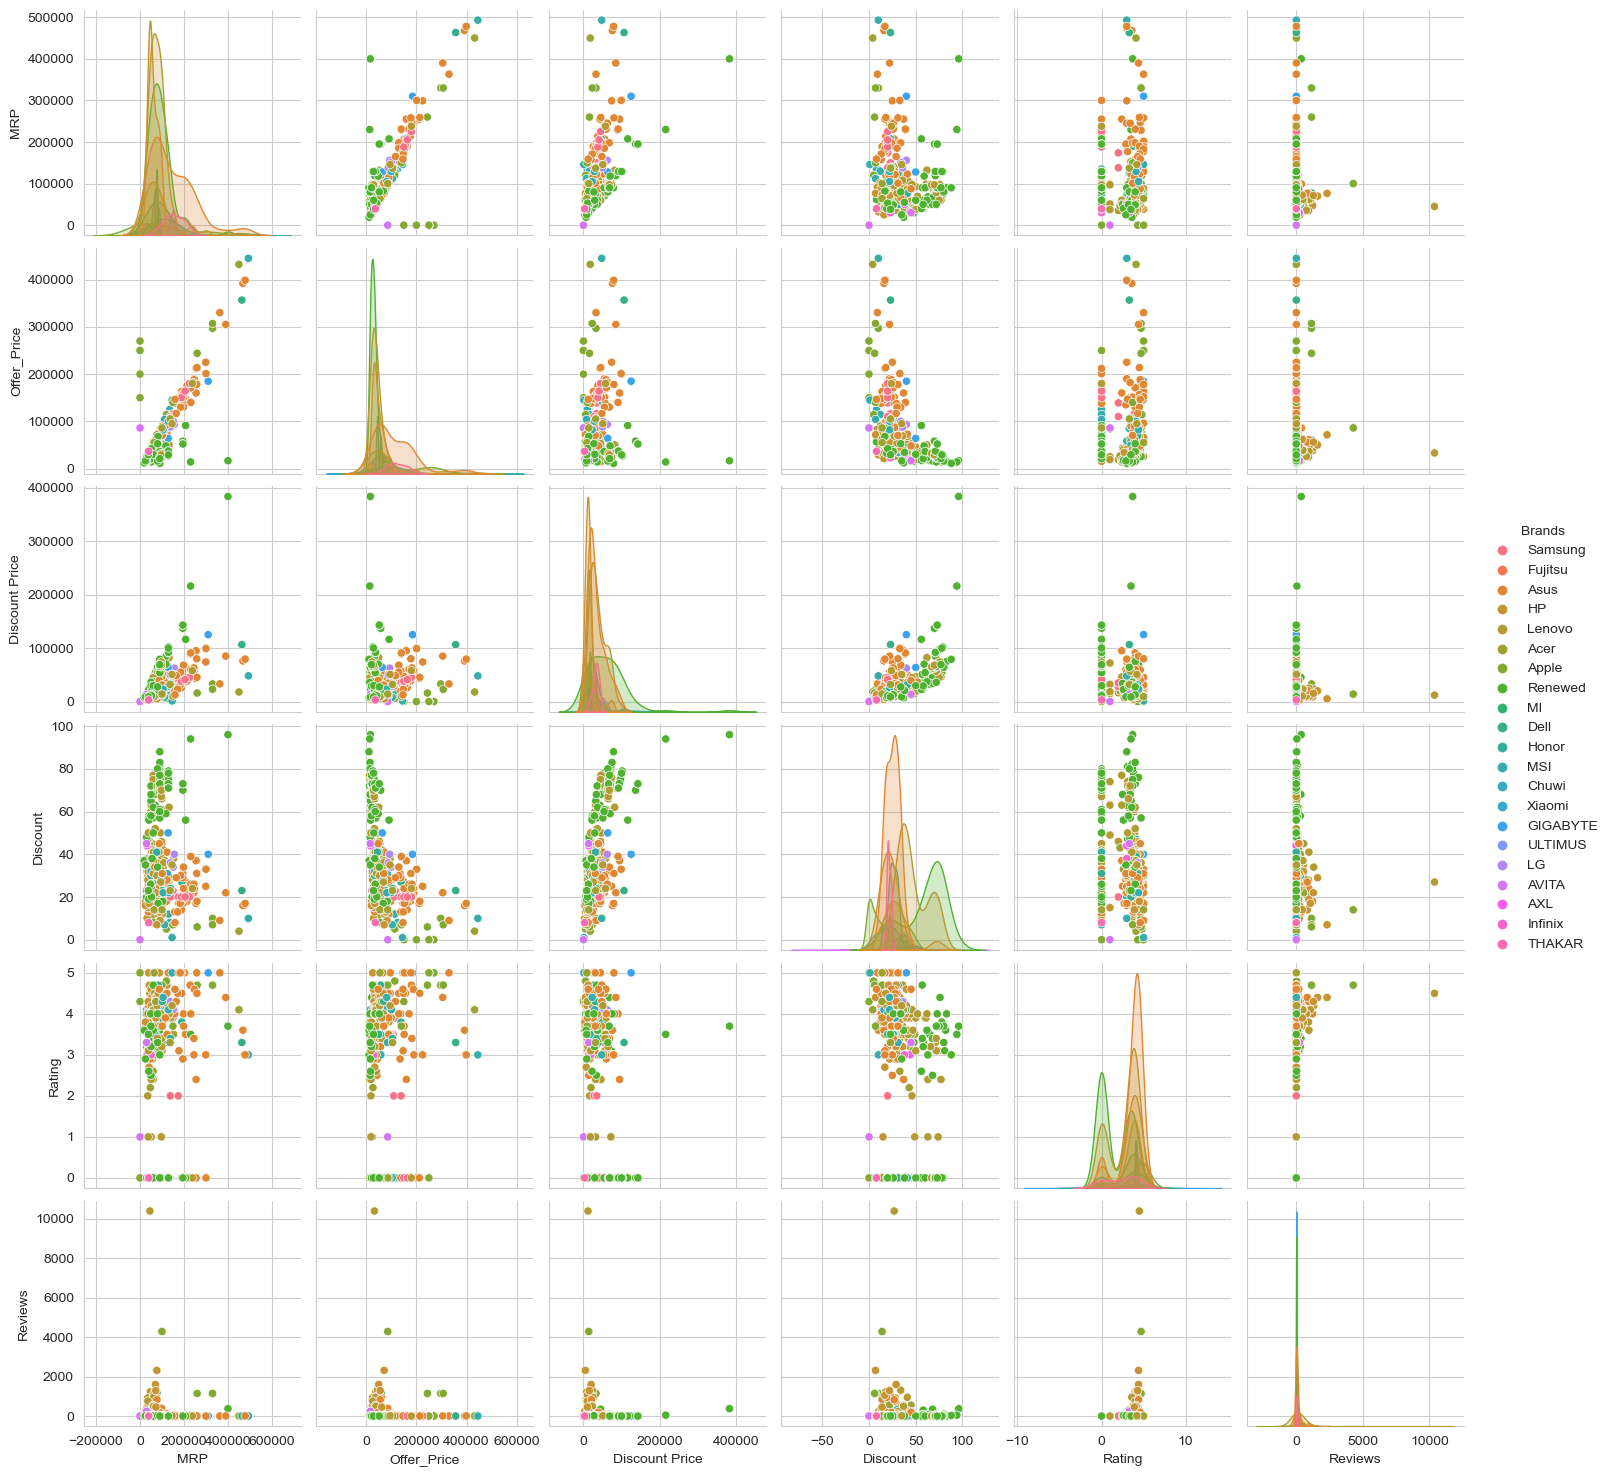

In [43]:
sns.pairplot(df2, hue='Brands')

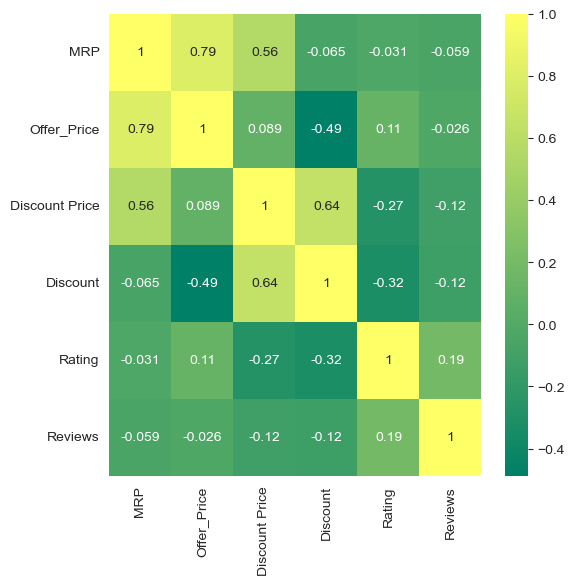

In [44]:
plt.figure(figsize=(6,6))
sns.heatmap(df2.corr(), annot=True, cmap = "summer")
plt.show()

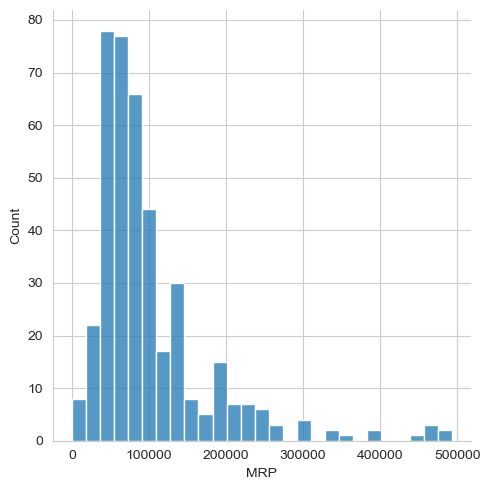

In [45]:
sns.displot(df2['MRP'])

* ### MRP price for most no.of.products are in between 35000 to below 1 lakh

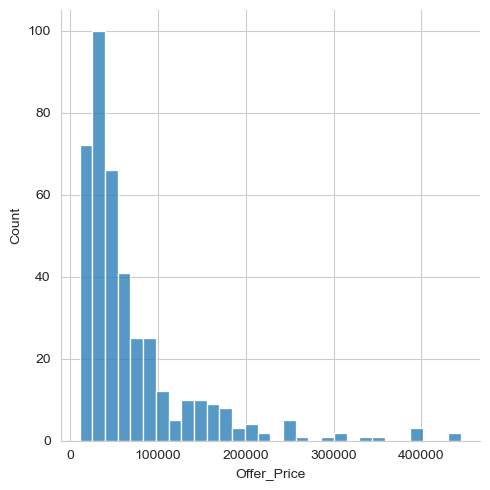

In [46]:
sns.displot(df2['Offer_Price'])

* ### Offer price for most no.of.products are in between 25000 to below 1 lakh

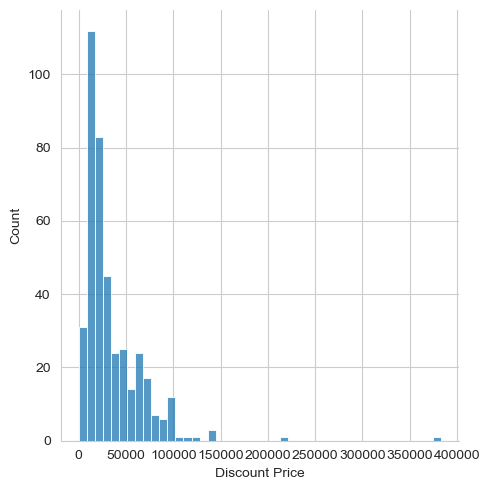

In [47]:
sns.displot(df2['Discount Price'])

* ### Discount price for most no.of.products are in between 20000 to below 50000

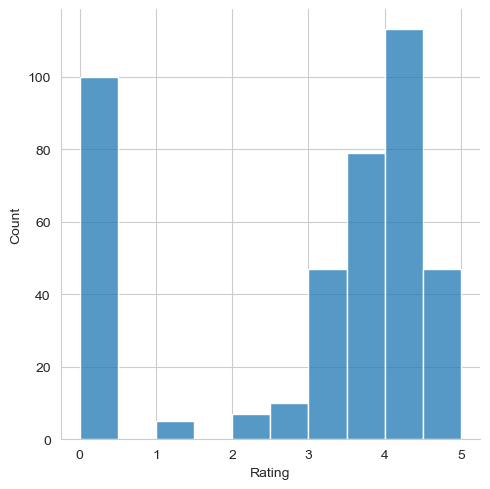

In [48]:
sns.displot(df2['Rating'])

* ### Ratings for most of the products is in between 3.5 to 4 rating, Even 100 products has got 0 rating

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

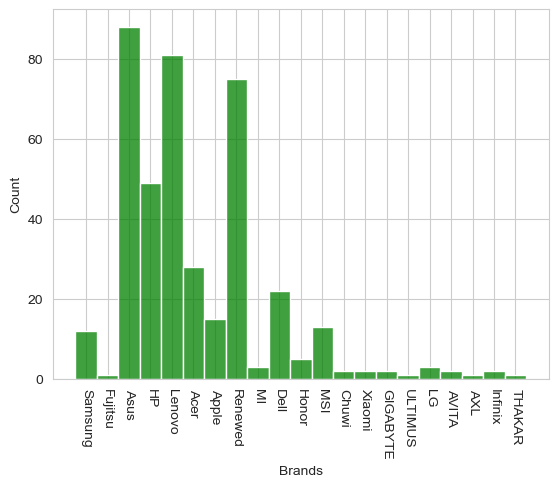

In [49]:
sns.histplot(data=df2, x="Brands",color="green")
plt.xticks(rotation = 270)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

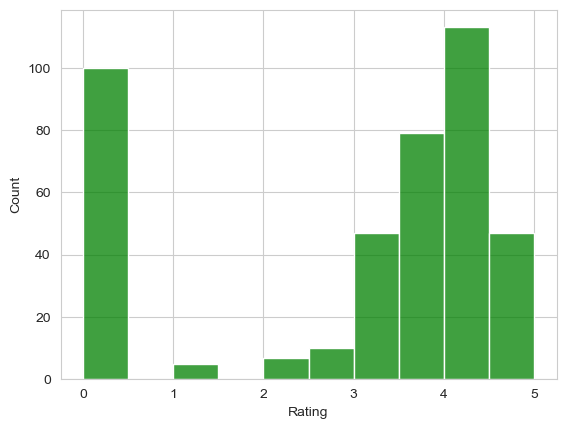

In [50]:
sns.histplot(data=df2, x="Rating",color="green")

<AxesSubplot:xlabel='Offer_Price', ylabel='Density'>

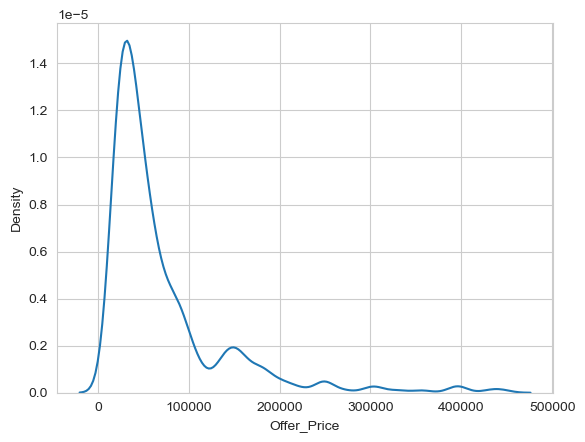

In [51]:
sns.kdeplot(data=df2, x="Offer_Price", bw_adjust=0.5)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

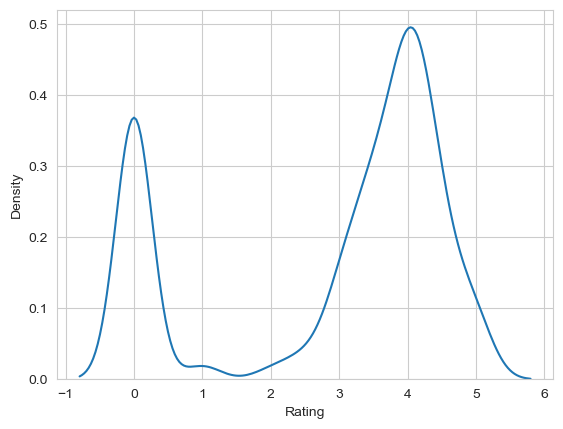

In [52]:
sns.kdeplot(data=df2, x="Rating", bw_adjust=0.5)